# Homework 6: Part I

1. Go get data from kaggle.com and do a ***(Univariate) Bayesian Logistic Regression*** analysis

2. Adjust the code below to specify that the outcomes have a Bernoulli distribution and use a ***logit*** or ***probit link function*** (or $\Pr(z\leq 0)$ for latent $z$ ) to correctly paramterize the predicted values of the observed outcomes

```python
import pymc as pm; import numpy as np
n,p=100,10; X,y=np.zeros((n,p)),np.ones((n,1))
# Replace this made up data with your data set from kaggle...
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # half normal
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample()
```    

3. Choose ***prior*** that are sensible for your specification

4. [Optional] Assess the performance of the MCMC and any issues or warnings in the [standard manner](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview)

4. [Optional] Go get data from kaggle.com and do a ***Multivariate Bayesian Logistic Regression*** analysis


In [ ]:
import pymc as pm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load the data
df = pd.read_csv('candy-data.csv')
# I want to predict whether a candy is chocolate or not.
# Select coloumn and define features and variable
X = df.drop(['chocolate','competitorname'], axis=1).values # Features to predict
y = df['chocolate'].values # Target Variable
# Reshape y to match the expected dimensions
y = y.reshape(-1, 1)
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Define the number of samples (n) and predictors (p)
n, p = X.shape
# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (85, 11)
Shape of y: (85, 1)


In [ ]:
# Set Priors and Likelihood
with pm.Model() as LM:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    linear_comb = pm.math.dot(X, betas)
    p = pm.math.sigmoid(linear_comb) # Logic Link Function
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
# Sampling
with LM:
  idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

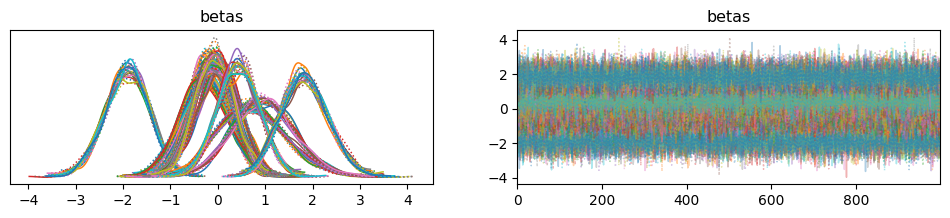

In [ ]:
import arviz as az
# Trace plots
az.plot_trace(idata)

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (121) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\n0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1'}>,
        <Axes: title={'center': 'betas\n0, 2'}>,
        <Axes: title={'center': 'betas\n0, 3'}>],
       [<Axes: title={'center': 'betas\n0, 4'}>,
        <Axes: title={'center': 'betas\n0, 5'}>,
        <Axes: title={'center': 'betas\n0, 6'}>,
        <Axes: title={'center': 'betas\n0, 7'}>],
       [<Axes: title={'center': 'betas\n0, 8'}>,
        <Axes: title={'center': 'betas\n0, 9'}>,
        <Axes: title={'center': 'betas\n0, 10'}>,
        <Axes: title={'center': 'betas\n1, 0'}>],
       [<Axes: title={'center': 'betas\n1, 1'}>,
        <Axes: title={'center': 'betas\n1, 2'}>,
        <Axes: title={'center': 'betas\n1, 3'}>,
        <Axes: title={'center': 'betas\n1, 4'}>],
       [<Axes: title={'center': 'betas\n1, 5'}>,
        <Axes: title={'center': 'betas\n1, 6'}>,
        <Axes: title={'center': 'betas\n1, 7'}>,
        <Axes: title={'center': 'betas\n1, 8'}>],
       [<Axes:

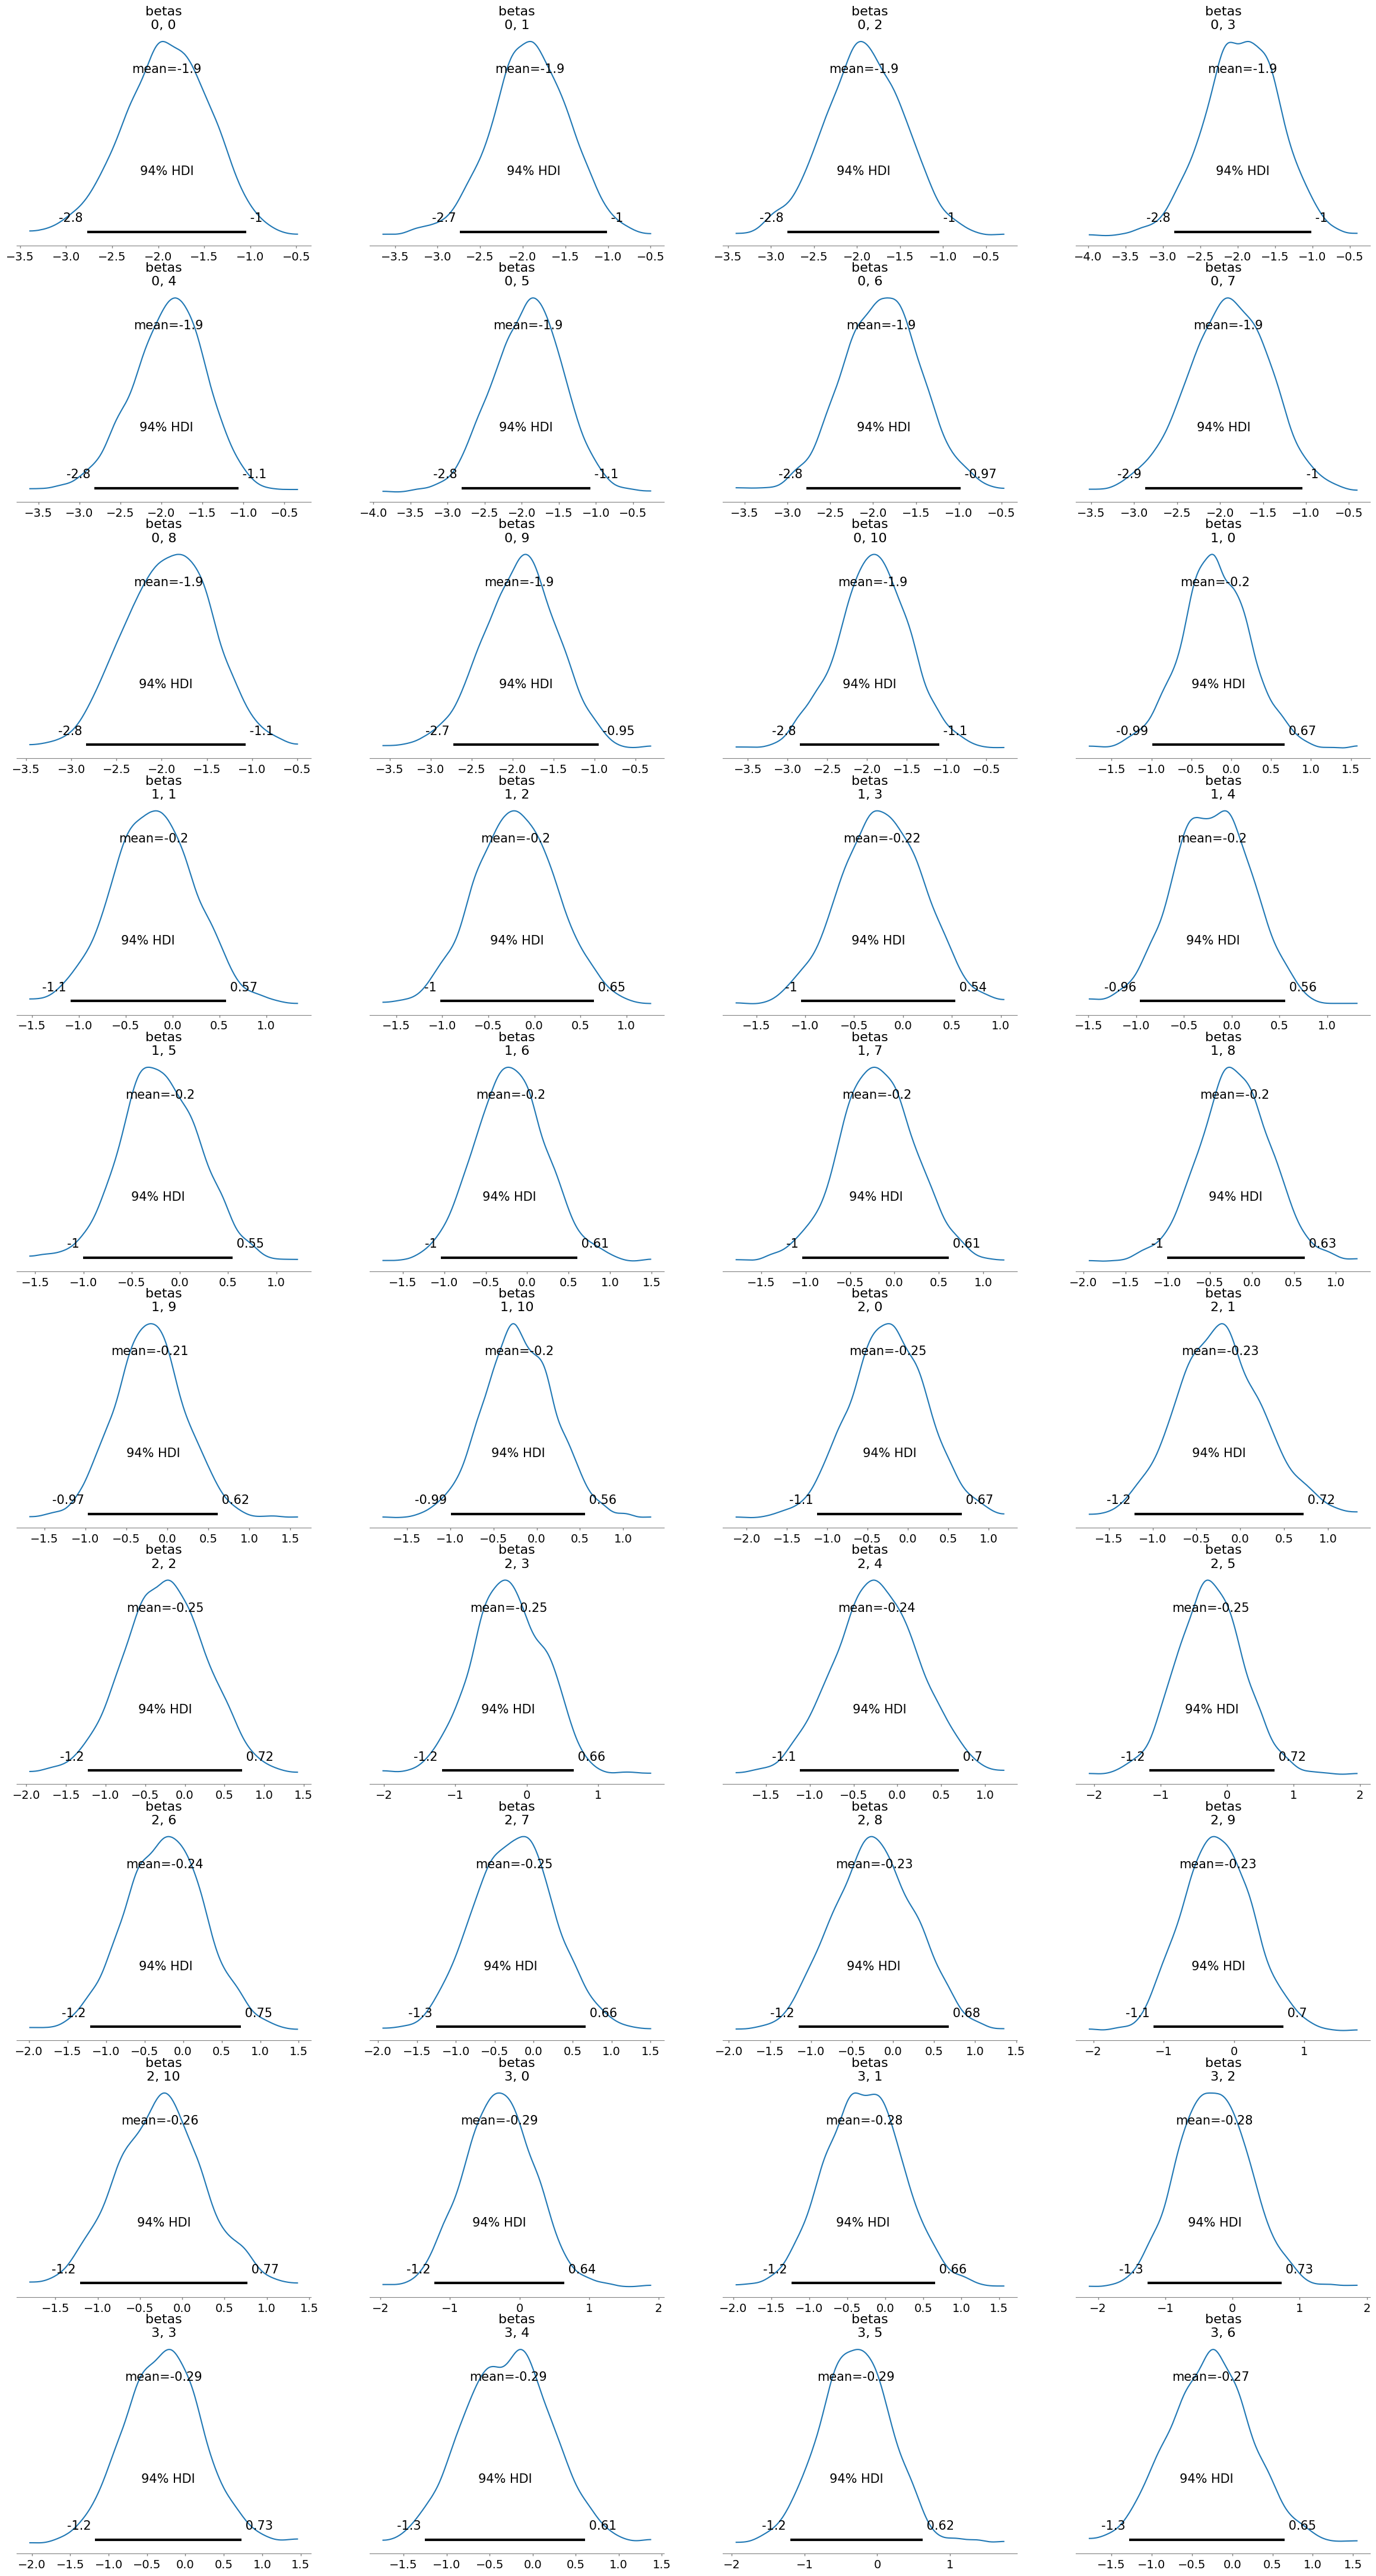

In [ ]:
# Posterior distributions
az.plot_posterior(idata)

In [ ]:
# Convergence diagnostics
az.summary(idata, hdi_prob=0.95)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
betas[0, 0]   -1.907  0.469    -2.792     -0.971      0.008    0.006   
betas[0, 1]   -1.920  0.461    -2.812     -1.007      0.009    0.007   
betas[0, 2]   -1.918  0.467    -2.972     -1.113      0.008    0.006   
betas[0, 3]   -1.937  0.494    -2.921     -1.014      0.008    0.006   
betas[0, 4]   -1.914  0.469    -2.866     -1.027      0.010    0.007   
...              ...    ...       ...        ...        ...      ...   
betas[10, 6]   1.833  0.495     0.877      2.803      0.009    0.007   
betas[10, 7]   1.839  0.518     0.890      2.879      0.008    0.006   
betas[10, 8]   1.830  0.506     0.930      2.878      0.009    0.007   
betas[10, 9]   1.837  0.493     0.884      2.768      0.009    0.007   
betas[10, 10]  1.845  0.504     0.851      2.812      0.009    0.007   

               ess_bulk  ess_tail  r_hat  
betas[0, 0]      3449.0    1479.0    1.0  
betas[0, 1]      2809.0    1756.0    1.0  
betas[0, 2]      3462.0    1721.0    1.0  
betas[0, 3]      3441.0    1428.0    1.0  
betas[0, 4]      2503.0    1520.0    1.0  
...                 ...       ...    ...  
betas[10, 6]     3141.0    2051.0    1.0  
betas[10, 7]     3972.0    1598.0    1.0  
betas[10, 8]     3067.0    1344.0    1.0  
betas[10, 9]     3030.0    1698.0    1.0  
betas[10, 10]    3554.0    1856.0    1.0  

[121 rows x 9 columns]

All the value of R-![IMG_2449C14FEAEE-1.jpeg](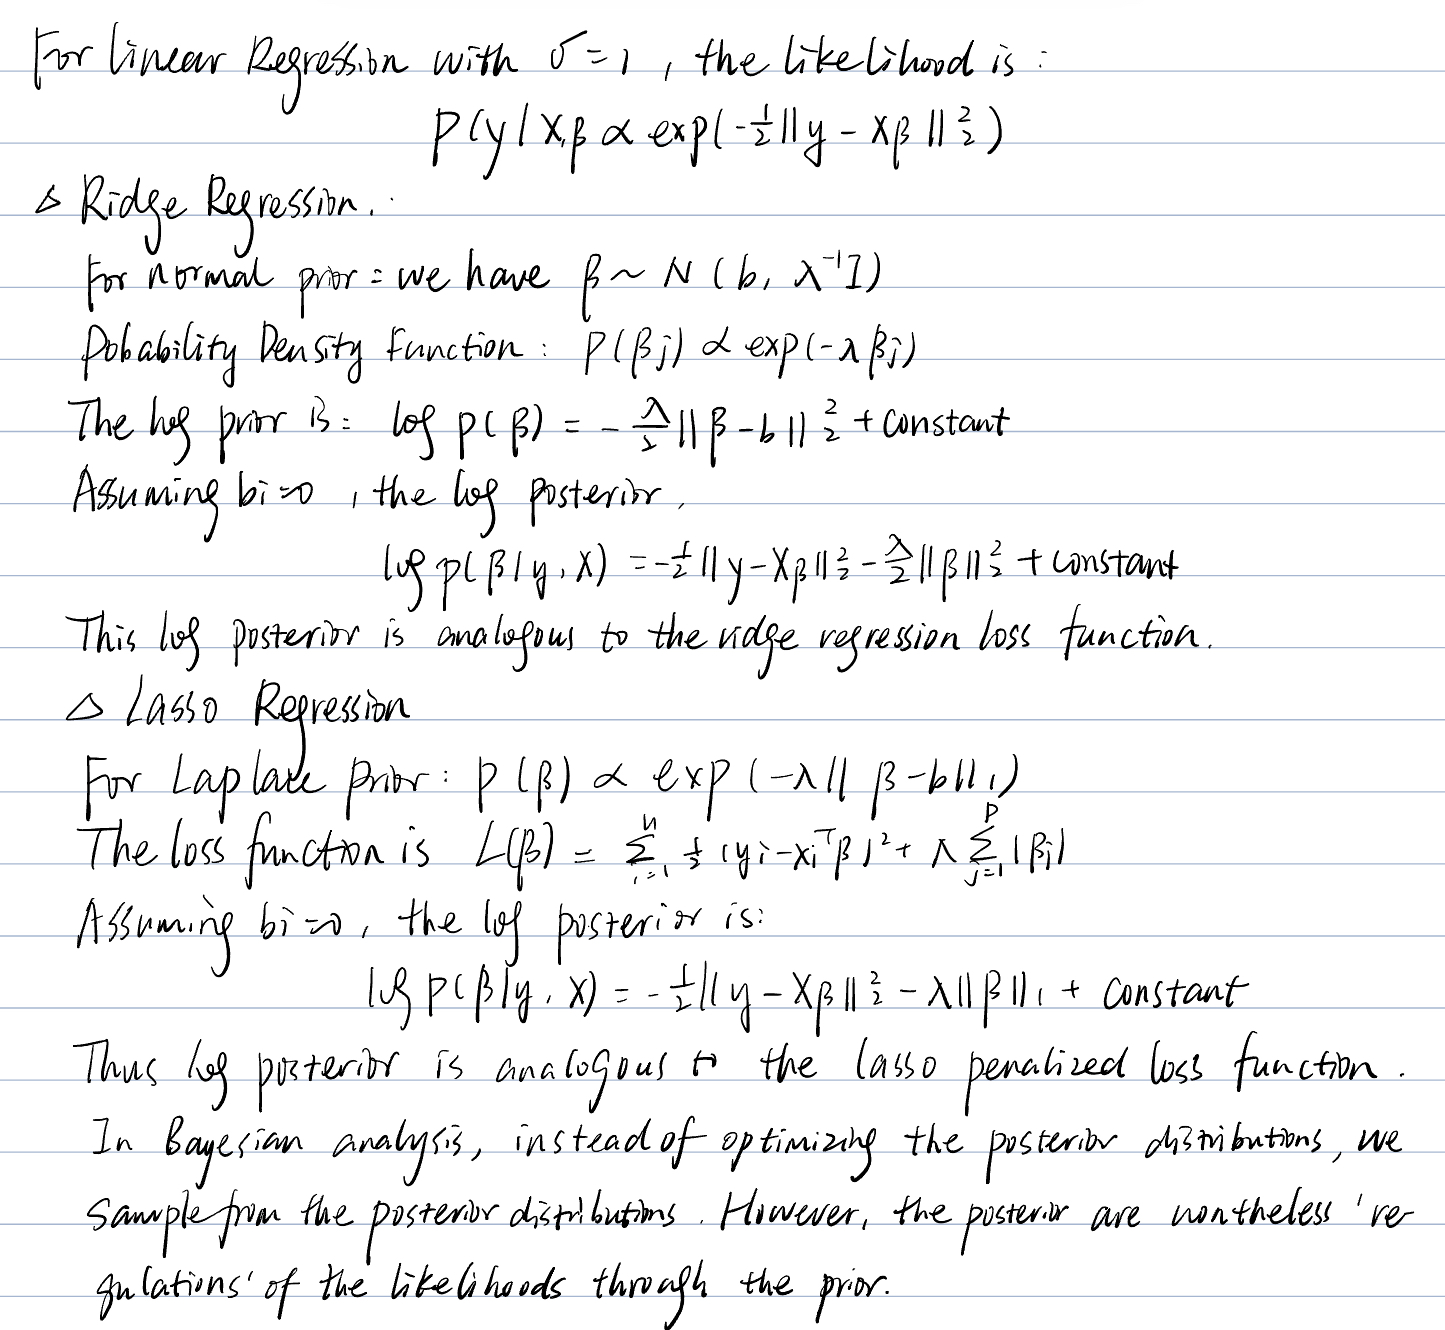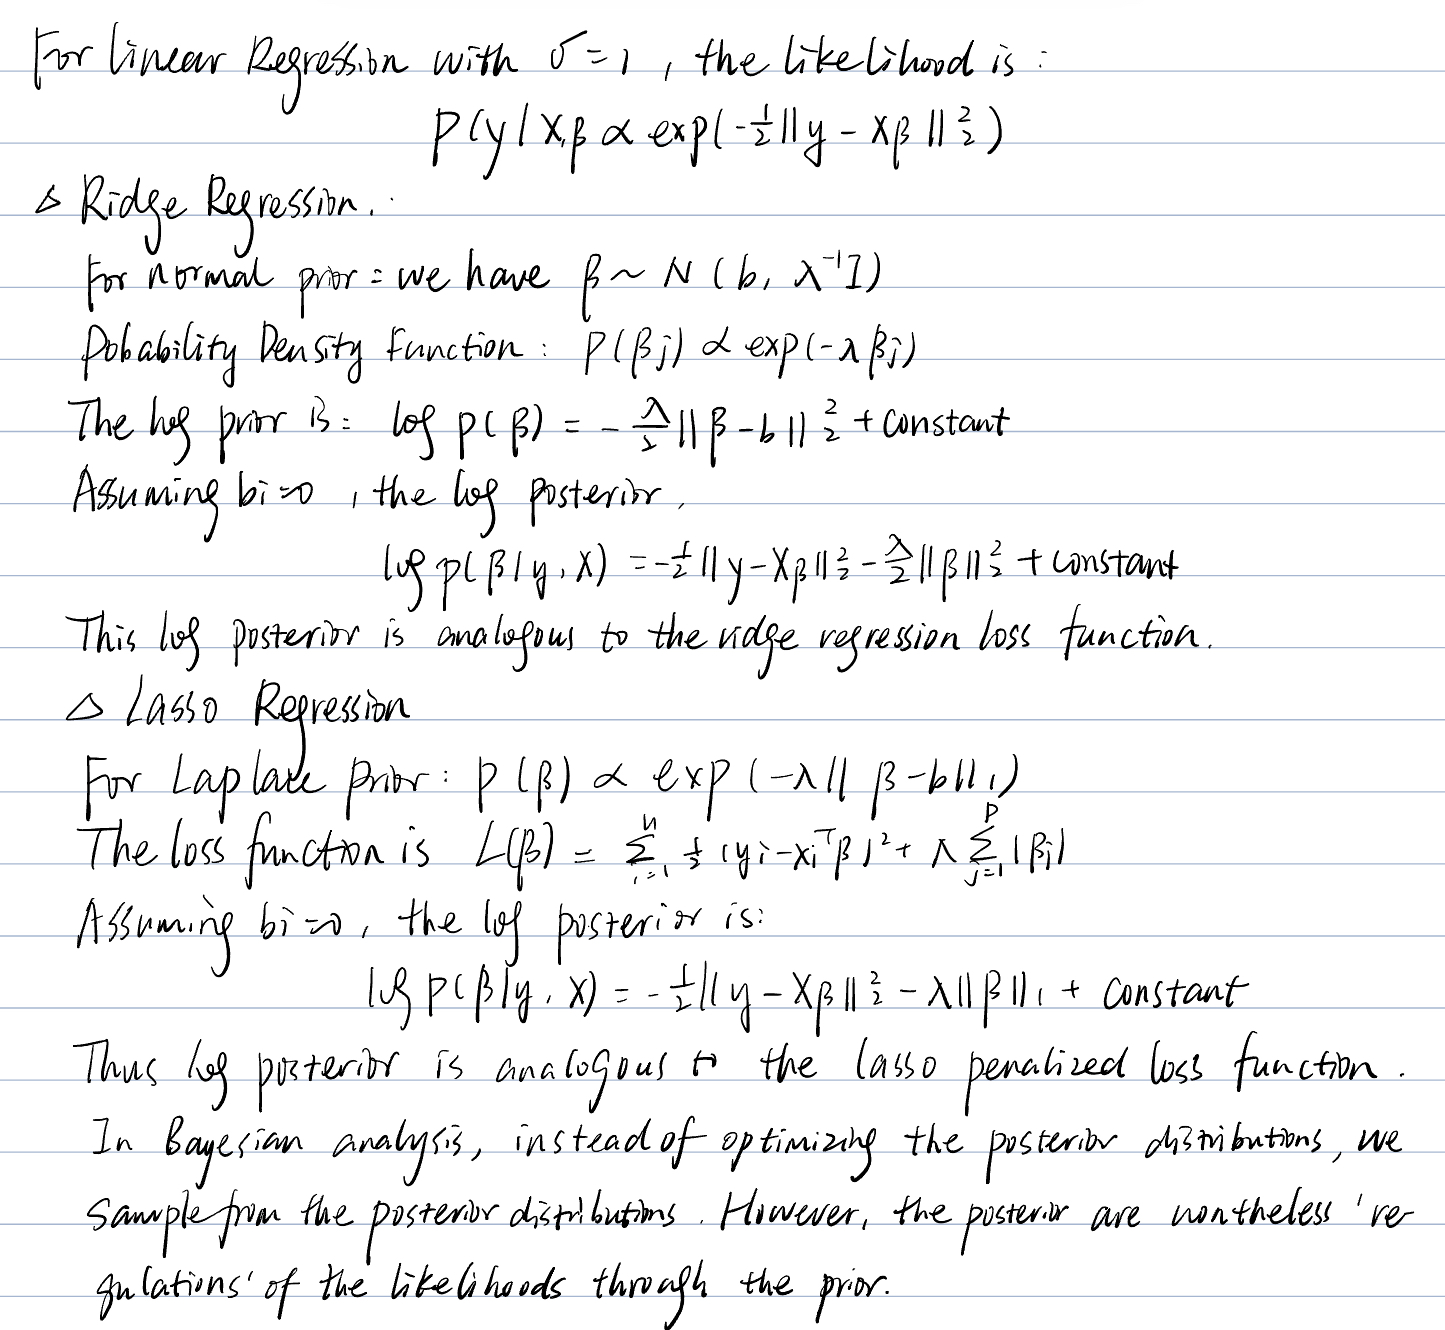)hat are close to 1, so the chains have converged well.

# Homework 6: Part II<br>Regularized Loss Functions

***Machine Learning*** fits models by optimizing penalized ***loss functions***

Two classic regularizations are "ridge" and "lasso" regression, which respectively use $L_2$ and $L_1$ penalty functions

- Lasso: $$\sum_{i=1}^n \frac{1}{2}(y_i-x_i^T\beta_{p \times 1})^2 + \lambda \sum_{j=1}^n \beta_j^2 = \frac{1}{2}(y-X\beta)^T(y-X\beta) + \lambda \sum_{j=1}^n \beta_j^2 = \frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_2^2 $$
- Ridge: $$\sum_{i=1}^n \frac{1}{2}(y-x_i^T\beta_{p \times 1})^2 + \lambda \sum_{j=1}^n |\beta_j| = \frac{1}{2}(y-X\beta)^T(y-X\beta) + \lambda \sum_{j=1}^n |\beta_j| = \frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1$$
    
Show that for $\sigma=1$ and ***hyperparameters*** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either ***normal*** or ***Laplace*** prior distributions have analagous forms to the above expressions

Now write down and understand the following: "Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior."

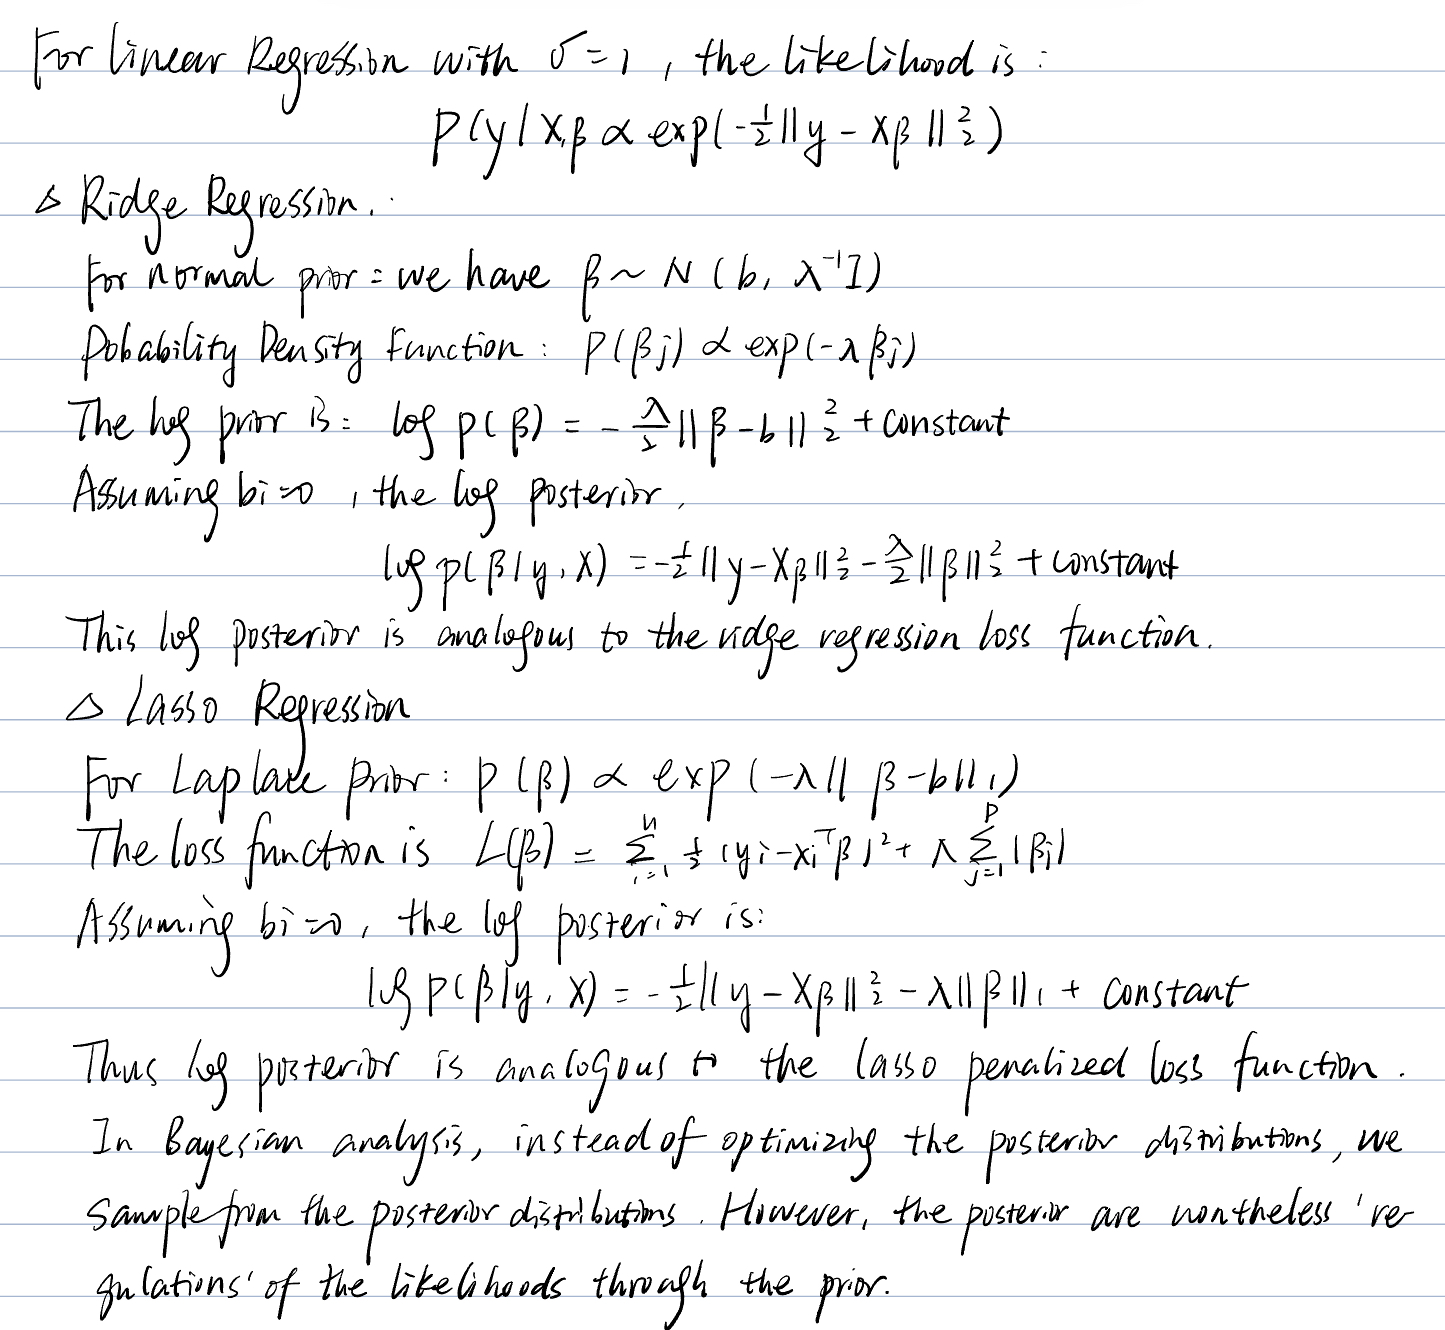